In [1]:
%load_ext tensorboard
# Import our dependencies
import tensorflow as tf 
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
import datetime
import os 
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow import keras
import io 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, MetaData, Table
from config import *

#  Import and read the charity_data.csv.
import pandas as pd 
#Confirmed_False_planets_df = pd.read_csv("data/confirmed_False_planets.csv")
#Candidate_planets_df = pd.read_csv("data/Candidate_planets.csv")
#Confirmed_False_planets_df.head()

In [2]:
engine= create_engine(database_url)
connection = engine.connect()

In [3]:
Confirmed_False_planets_df = pd.read_sql_table('false_planets', engine)

In [4]:
Confirmed_False_planets_df

,koi_name,exoplanet_archive_disposition,orbital_period,transit_epoch,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux_earth,transit_signal_to_noise,stellar_effective_temperature,stellar_surface_gravity,stellar_radius,ra,decimal_degrees,kepler_band
0,K00752.01,CONFIRMED,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,K00752.02,CONFIRMED,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,K00754.01,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
3,K00755.01,CONFIRMED,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509
4,K00756.01,CONFIRMED,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7242,K08198.01,FALSE POSITIVE,373.893980,261.496800,0.963,27.66000,730.0,2.51,206.0,0.42,18.5,5263.0,4.574,0.699,290.93597,47.290730,14.911
7243,K07984.01,FALSE POSITIVE,8.589871,132.016100,0.765,4.80600,87.7,1.11,929.0,176.40,8.4,5638.0,4.296,1.088,298.74921,46.973351,14.478
7244,K07985.01,FALSE POSITIVE,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3,5638.0,4.529,0.903,297.18875,47.093819,14.082
7245,K07987.01,FALSE POSITIVE,0.681402,132.181750,0.147,0.86500,103.6,1.07,2218.0,5713.41,12.3,6173.0,4.447,1.041,294.16489,47.176281,15.385


In [5]:
#Candidate_planets_df.head()

In [6]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
%reload_ext tensorboard

In [7]:
TensorBoard(
    log_dir="logs",
    histogram_freq=0,
    write_graph=True,
    write_images=False,
    update_freq="epoch",
    profile_batch=2,
    embeddings_freq=0,
    embeddings_metadata=None,
)

In [8]:
tensorboard_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=False,
    update_freq="epoch",
)

In [9]:
Confirmed_False_planets_df=Confirmed_False_planets_df.set_index('koi_name')
#Candidate_planets_df =Candidate_planets_df.set_index('KOI_Name')
Confirmed_False_planets_df

,exoplanet_archive_disposition,orbital_period,transit_epoch,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux_earth,transit_signal_to_noise,stellar_effective_temperature,stellar_surface_gravity,stellar_radius,ra,decimal_degrees,kepler_band
koi_name,,,,,,,,,,,,,,,,
K00752.01,CONFIRMED,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
K00752.02,CONFIRMED,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
K00754.01,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
K00755.01,CONFIRMED,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509
K00756.01,CONFIRMED,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K08198.01,FALSE POSITIVE,373.893980,261.496800,0.963,27.66000,730.0,2.51,206.0,0.42,18.5,5263.0,4.574,0.699,290.93597,47.290730,14.911
K07984.01,FALSE POSITIVE,8.589871,132.016100,0.765,4.80600,87.7,1.11,929.0,176.40,8.4,5638.0,4.296,1.088,298.74921,46.973351,14.478
K07985.01,FALSE POSITIVE,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3,5638.0,4.529,0.903,297.18875,47.093819,14.082


In [10]:
planets_category = Confirmed_False_planets_df.dtypes[Confirmed_False_planets_df.dtypes == "object"].index.tolist()
planets_category

['exoplanet_archive_disposition']

In [11]:

zero_one_df = Confirmed_False_planets_df['exoplanet_archive_disposition'].replace({'CONFIRMED':1, 'FALSE POSITIVE':0})
zero_one_df

koi_name
K00752.01    1
K00752.02    1
K00754.01    0
K00755.01    1
K00756.01    1
            ..
K08198.01    0
K07984.01    0
K07985.01    0
K07987.01    0
K07989.01    0
Name: exoplanet_archive_disposition, Length: 7247, dtype: int64

In [17]:
Confirmed_False_planets_df = Confirmed_False_planets_df.drop(columns = 'exoplanet_archive_disposition')
Confirmed_False_planets_df

,orbital_period,transit_epoch,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux_earth,transit_signal_to_noise,stellar_effective_temperature,stellar_surface_gravity,stellar_radius,ra,decimal_degrees,kepler_band
koi_name,,,,,,,,,,,,,,,
K00752.01,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
K00752.02,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
K00754.01,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
K00755.01,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509
K00756.01,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K08198.01,373.893980,261.496800,0.963,27.66000,730.0,2.51,206.0,0.42,18.5,5263.0,4.574,0.699,290.93597,47.290730,14.911
K07984.01,8.589871,132.016100,0.765,4.80600,87.7,1.11,929.0,176.40,8.4,5638.0,4.296,1.088,298.74921,46.973351,14.478
K07985.01,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3,5638.0,4.529,0.903,297.18875,47.093819,14.082


In [18]:
new_planets_df = Confirmed_False_planets_df.merge(zero_one_df, left_index=True,right_index=True)
new_planets_df

,orbital_period,transit_epoch,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux_earth,transit_signal_to_noise,stellar_effective_temperature,stellar_surface_gravity,stellar_radius,ra,decimal_degrees,kepler_band,exoplanet_archive_disposition
koi_name,,,,,,,,,,,,,,,,
K00752.01,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347,1
K00752.02,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347,1
K00754.01,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597,0
K00755.01,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509,1
K00756.01,11.094321,171.201160,0.538,4.59450,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K08198.01,373.893980,261.496800,0.963,27.66000,730.0,2.51,206.0,0.42,18.5,5263.0,4.574,0.699,290.93597,47.290730,14.911,0
K07984.01,8.589871,132.016100,0.765,4.80600,87.7,1.11,929.0,176.40,8.4,5638.0,4.296,1.088,298.74921,46.973351,14.478,0
K07985.01,0.527699,131.705093,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3,5638.0,4.529,0.903,297.18875,47.093819,14.082,0


In [ ]:
# Create a OneHotEncoder instance
#enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#encode_df = pd.DataFrame(enc.fit_transform(Confirmed_False_planets_df[planets_category]))

# Add the encoded variable names to the dataframe
#encode_df.columns = enc.get_feature_names_out(planets_category)
#encode_df.index = Confirmed_False_planets_df.index
#encode_df

In [ ]:
# Merge one-hot encoded features and drop the originals
#new_planets_df = Confirmed_False_planets_df.merge(encode_df, left_index=True,right_index=True).drop(columns = planets_category)
#new_planets_df

In [19]:
# Determine the number of unique values in each column.
new_planets_df.nunique()

orbital_period                   7247
transit_epoch                    7230
impact_parameter                 1980
transit_duration                 6473
transit_depth                    5999
planetary_radius                 2782
equilibrium_temperature          2427
insolation_flux_earth            6419
transit_signal_to_noise          2642
stellar_effective_temperature    2272
stellar_surface_gravity          1415
stellar_radius                   2063
ra                               6347
decimal_degrees                  6379
kepler_band                      3485
exoplanet_archive_disposition       2
dtype: int64

In [20]:
#planets_value_counts = planets_df["TCE_Planet_Number"].value_counts()
#planets_value_counts

In [21]:
#planets_value_counts = planets_df["TCE_Delivery"].value_counts()
#planets_value_counts

In [25]:
new_planets_df.exoplanet_archive_disposition.value_counts()

0    4582
1    2665
Name: exoplanet_archive_disposition, dtype: int64

In [26]:
# Split our preprocessed data into our features and target arrays
y = new_planets_df.exoplanet_archive_disposition
X = new_planets_df.drop(columns= ["exoplanet_archive_disposition"] )

# Split the preprocessed data into a training and testing dataset
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, random_state=42, stratify=y, test_size =0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, random_state=42,test_size =0.5 )

In [27]:
X_val_test

,orbital_period,transit_epoch,impact_parameter,transit_duration,transit_depth,planetary_radius,equilibrium_temperature,insolation_flux_earth,transit_signal_to_noise,stellar_effective_temperature,stellar_surface_gravity,stellar_radius,ra,decimal_degrees,kepler_band
koi_name,,,,,,,,,,,,,,,
K01080.01,1.096583,133.614360,0.4210,2.11880,308.5,1.35,1474.0,1119.90,44.3,5222.0,4.528,0.763,297.78802,47.101070,14.867
K00959.01,12.713794,175.072568,0.4850,2.44093,36719.0,2.31,181.0,0.26,2981.3,2661.0,5.283,0.116,287.55972,46.957085,13.102
K06864.01,0.566790,131.818460,0.6376,4.00800,25.4,0.40,1984.0,3662.84,15.4,5799.0,4.600,0.758,291.70813,42.969410,13.767
K05151.01,26.153785,145.287900,0.2437,1.80200,228.6,1.47,631.0,37.53,6.2,6091.0,4.487,0.967,298.51175,40.459469,14.833
K02094.02,198.680859,270.665350,0.7460,8.28200,645.4,2.79,297.0,1.83,16.6,5330.0,4.366,1.013,295.66287,44.525841,15.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K01528.01,3.989544,134.098900,0.0850,1.59100,190.0,0.93,903.0,157.10,26.2,5229.0,4.643,0.688,294.64990,43.335590,14.083
K02205.01,24.086322,148.200860,0.8020,2.23600,1041.7,2.78,500.0,14.78,18.0,4973.0,4.537,0.768,281.69397,46.946449,15.464
K04211.02,0.696290,131.526760,1.1230,3.83900,120.5,12.63,1969.0,3537.89,19.4,5904.0,4.543,0.867,283.72379,40.237560,15.034


In [28]:
y_val_test

koi_name
K01080.01    0
K00959.01    0
K06864.01    0
K05151.01    0
K02094.02    1
            ..
K01528.01    1
K02205.01    1
K04211.02    0
K00829.03    1
K06902.01    0
Name: exoplanet_archive_disposition, Length: 1450, dtype: int64

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=42))
classifier.fit(X_train, y_train)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)
X_val_test_scaled = X_scaler.transform(X_val_test)

C:\anaconda\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,
C:\anaconda\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,
C:\anaconda\envs\mlenv\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\anaconda\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,
C:\anaconda\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature n

In [30]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
#print("X_val_test shape: {}".format(X_val_test.shape))
#print("y_val_test shape: {}".format(y_val_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (5797, 15)
X_test shape: (725, 15)
y_train shape: (5797,)
y_test shape: (725,)
X_val shape: (725, 15)
y val shape: (725,)


In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 35

model = tf.keras.models.Sequential([

# First hidden layer
(
    tf.keras.layers.Dense(units=56, input_dim=number_input_features, activation="relu")
),

# Second hidden layer
(tf.keras.layers.Dense(units=16, activation="tanh")),
(tf.keras.layers.Dense(units=41, activation="tanh")),
(tf.keras.layers.Dense(units=46, activation="tanh")), 
(tf.keras.layers.Dense(units=46, activation="tanh")),  
(tf.keras.layers.Dense(units=16, activation="tanh")),      
# Output layer
(tf.keras.layers.Dense(units=1, activation="sigmoid"))])

# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 56)                896       
                                                                 
 dense_1 (Dense)             (None, 16)                912       
                                                                 
 dense_2 (Dense)             (None, 41)                697       
                                                                 
 dense_3 (Dense)             (None, 46)                1932      
                                                                 
 dense_4 (Dense)             (None, 46)                2162      
                                                                 
 dense_5 (Dense)             (None, 16)                752       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [32]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val) , epochs=150, callbacks=[tensorboard_callback])

Epoch 1/150
182/182 [==============================] - 1s 3ms/step - loss: 0.4097 - accuracy: 0.8102 - val_loss: 0.3593 - val_accuracy: 0.8483
Epoch 2/150
182/182 [==============================] - ETA: 0s - loss: 0.3420 - accuracy: 0.85 - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8501 - val_loss: 0.3325 - val_accuracy: 0.8607
Epoch 3/150
182/182 [==============================] - ETA: 0s - loss: 0.3117 - accuracy: 0.86 - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8598 - val_loss: 0.3292 - val_accuracy: 0.8566
Epoch 4/150
182/182 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8696 - val_loss: 0.3213 - val_accuracy: 0.8676
Epoch 5/150
182/182 [==============================] - ETA: 0s - loss: 0.2916 - accuracy: 0.87 - 0s 2ms/step - loss: 0.2958 - accuracy: 0.8727 - val_loss: 0.3155 - val_accuracy: 0.8648
Epoch 6/150
182/182 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8768 - val_loss: 0.3191 - val_accuracy: 0.8690
Epoch 7/150
182/

182/182 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9286 - val_loss: 0.3513 - val_accuracy: 0.8828
Epoch 57/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9293 - val_loss: 0.3260 - val_accuracy: 0.8814
Epoch 58/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1709 - accuracy: 0.9289 - val_loss: 0.3403 - val_accuracy: 0.8855
Epoch 59/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.9277 - val_loss: 0.3440 - val_accuracy: 0.8869
Epoch 60/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9301 - val_loss: 0.3535 - val_accuracy: 0.8814
Epoch 61/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1690 - accuracy: 0.9312 - val_loss: 0.3166 - val_accuracy: 0.8786
Epoch 62/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1678 - accuracy: 0.9294 - val_loss: 0.3416 - val_accuracy: 0.8745
Epoch

182/182 [==============================] - 0s 2ms/step - loss: 0.1301 - accuracy: 0.9446 - val_loss: 0.3895 - val_accuracy: 0.8772
Epoch 113/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1168 - accuracy: 0.9536 - val_loss: 0.4143 - val_accuracy: 0.8800
Epoch 114/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.9488 - val_loss: 0.4009 - val_accuracy: 0.8828
Epoch 115/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1190 - accuracy: 0.9472 - val_loss: 0.4164 - val_accuracy: 0.8731
Epoch 116/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1417 - accuracy: 0.9403 - val_loss: 0.4166 - val_accuracy: 0.8690
Epoch 117/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.9526 - val_loss: 0.4120 - val_accuracy: 0.8759
Epoch 118/150
182/182 [==============================] - 0s 2ms/step - loss: 0.1196 - accuracy: 0.9489 - val_loss: 0.4273 - val_accuracy: 0.8731

In [33]:
#tensorboard --logdir logs/image/cm/

In [34]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 17976), started 2 days, 1:08:32 ago. (Use '!kill 17976' to kill it.)

In [35]:
model_loss, model_accuracy = model.evaluate(X_val_scaled,y_val,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

23/23 - 0s - loss: 0.4832 - accuracy: 0.8566 - 23ms/epoch - 1ms/step
Loss: 0.4831776022911072, Accuracy: 0.8565517067909241


In [68]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
prediction = model.predict(X_test_scaled)
#cm = confusion_matrix(y_true, y_proba)
#cm
prediction

array([[9.74825859e-01],
       [9.98588443e-01],
       [4.37945127e-04],
       [5.41001618e-01],
       [9.96262074e-01],
       [9.19594705e-01],
       [9.99210715e-01],
       [6.59446061e-01],
       [1.05078208e-04],
       [9.99976873e-01],
       [7.34969378e-02],
       [8.40831635e-05],
       [9.99204993e-01],
       [8.68188202e-01],
       [2.08135516e-05],
       [7.73397624e-05],
       [3.11876538e-05],
       [6.03143826e-06],
       [2.88409210e-05],
       [9.99984980e-01],
       [8.00817434e-05],
       [3.53795052e-01],
       [1.04790643e-05],
       [6.75297320e-01],
       [5.85252237e-05],
       [9.99954581e-01],
       [5.63175142e-01],
       [9.99385536e-01],
       [9.99857426e-01],
       [8.74233228e-05],
       [1.19161606e-03],
       [3.23170424e-02],
       [2.62032700e-05],
       [5.18801808e-01],
       [2.88262381e-05],
       [8.93398643e-01],
       [9.40276980e-01],
       [1.14817747e-04],
       [9.99769449e-01],
       [7.89312526e-06],


In [72]:
y_pred = (prediction>0.5).astype(int)
#compute accuracy pred and proba 
#check just val 
y_pred

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
    

In [70]:

y_true

koi_name
K00109.01    0
K00116.02    1
K04736.01    0
K01978.01    1
K00767.01    1
            ..
K01008.01    0
K05442.01    0
K04646.01    0
K07779.01    0
K03228.01    0
Name: exoplanet_archive_disposition, Length: 725, dtype: int64

In [39]:
true_df = y_true.to_frame("true")
true_df

,true
koi_name,
K00109.01,0
K00116.02,1
K04736.01,0
K01978.01,1
K00767.01,1
...,...
K01008.01,0
K05442.01,0
K04646.01,0


In [75]:
pred_df = pd.DataFrame(prediction,columns=["prediction"]).set_index(y_true.index)
pred_df

,prediction
koi_name,
K00109.01,0.974826
K00116.02,0.998588
K04736.01,0.000438
K01978.01,0.541002
K00767.01,0.996262
...,...
K01008.01,0.000027
K05442.01,0.146305
K04646.01,0.016501


In [76]:
y_pred_df = pd.DataFrame(y_pred,columns=["Rounded Predictions"]).set_index(y_true.index)
y_pred_df

,Rounded Predictions
koi_name,
K00109.01,1
K00116.02,1
K04736.01,0
K01978.01,1
K00767.01,1
...,...
K01008.01,0
K05442.01,0
K04646.01,0


In [77]:
pred_prob_df = proba_df.merge(y_pred_df, left_index=True,right_index=True)
pred_prob_df

,Probably,Rounded Predictions
koi_name,,
K00109.01,0.974826,1
K00116.02,0.998588,1
K04736.01,0.000438,0
K01978.01,0.541002,1
K00767.01,0.996262,1
...,...,...
K01008.01,0.000027,0
K05442.01,0.146305,0
K04646.01,0.016501,0


In [78]:
true_pred_prob_df = true_df.merge(pred_prob_df, left_index=True,right_index=True)
true_pred_prob_df

,true,Probably,Rounded Predictions
koi_name,,,
K00109.01,0,0.974826,1
K00116.02,1,0.998588,1
K04736.01,0,0.000438,0
K01978.01,1,0.541002,1
K00767.01,1,0.996262,1
...,...,...,...
K01008.01,0,0.000027,0
K05442.01,0,0.146305,0
K04646.01,0,0.016501,0


In [79]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[426,  45],
       [ 39, 215]], dtype=int64)

In [80]:
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,426,45
Actual 1,39,215


In [81]:
history_df = pd.DataFrame(fit_model.history)
history_df.index +=1

history_df

,loss,accuracy,val_loss,val_accuracy
1,0.409684,0.810247,0.359285,0.848276
2,0.342531,0.850095,0.332541,0.860690
3,0.318975,0.859755,0.329181,0.856552
4,0.308796,0.869588,0.321300,0.867586
5,0.295848,0.872693,0.315495,0.864828
...,...,...,...,...
146,0.110893,0.953942,0.460891,0.868966
147,0.099480,0.959289,0.480912,0.882759
148,0.089975,0.964809,0.475895,0.877241
149,0.100410,0.962049,0.504434,0.864828


<AxesSubplot:>

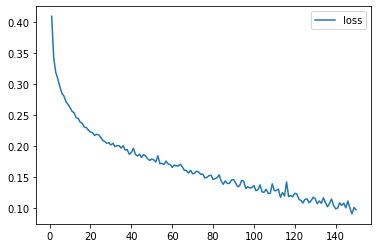

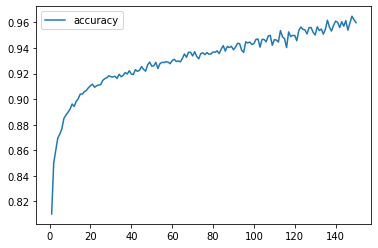

In [47]:
history_df.plot(y="loss")
history_df.plot(y="accuracy")

In [48]:
# Create a flattened one-dimensional array of tn, fp, fn, tp with ravel()
tn, fp, fn, tp = cm.ravel()

In [49]:
tn, fp, fn, tp

(426, 45, 39, 215)

In [50]:
# Calculate the precision of the model based on the confusion matrix
precision = tp / (tp + fp)
precision

0.8269230769230769

In [51]:
# Calculate the sensitivity of the model based on the confusion matrix
sensitivity = tp / (tp + fn)
sensitivity

0.8464566929133859

In [52]:
f1 = 2*precision*sensitivity / (precision + sensitivity)
f1

0.8365758754863812

In [53]:
 print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       471
           1       0.83      0.85      0.84       254

    accuracy                           0.88       725
   macro avg       0.87      0.88      0.87       725
weighted avg       0.88      0.88      0.88       725



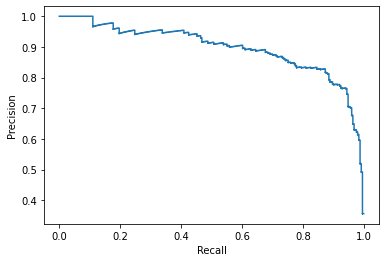

In [82]:
from sklearn.metrics import (precision_recall_curve,
                           PrecisionRecallDisplay)

precision, recall, _ = precision_recall_curve(y_true, prediction)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

C:\anaconda\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  FutureWarning,


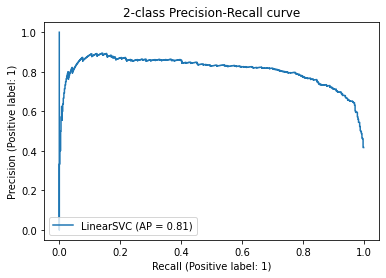

In [54]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_val_test, y_val_test
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [56]:
records = zero_one_df.to_records(index=False)

AttributeError: 'Series' object has no attribute 'to_records'

In [ ]:
result = list(records)
result

In [83]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score


In [ ]:
!kill 17976 

In [92]:
# Learn to predict each class against the other
classifier_ROC = OneVsRestClassifier(
    X_scaler(kernel="linear", probability=True, random_state=42)
)
y_score = classifier_ROC.fit(X_train, y_train).decision_function(X_test)


TypeError: 'StandardScaler' object is not callable

In [91]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs1 = X_scaler.predict_proba(X_test)
preds1 = probs1[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

AttributeError: 'StandardScaler' object has no attribute 'predict_proba'

In [ ]:
def plot_roc(y_test, y_score):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
plot_roc(y_test, y_score)

In [ ]:
!kill 17976 

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()